In [15]:
import numpy as np

# Generate a noise-free binary matrix of size 3 by 100 filled with zeros
matrix = np.zeros((3, 100), dtype=int)

# Define the window size for patterns (3 by 10)
window_size = (3, 3)

# Generate a priori patterns
patterns = [
    np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]]),
    np.array([[1, 1, 0], [1, 0, 1], [0, 1, 1]]),
    np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
]

# Randomly place the patterns within the matrix
repetitions = 3
for repetition in range(repetitions):
    for pattern in patterns:
        row_pos, col_pos = np.random.randint(0, matrix.shape[0] - window_size[0] + 1), np.random.randint(0, matrix.shape[1] - window_size[1] + 1)
        matrix[row_pos:row_pos + window_size[0], col_pos:col_pos + window_size[1]] = pattern

# Step 1: Pattern-Based Clustering
def extract_windows(matrix, window_size):
    windows = []
    for col in range(matrix.shape[1] - window_size[1] + 1):
        window = matrix[:, col : col + window_size[1]]
        windows.append(window)
    return windows

windows = extract_windows(matrix, window_size)

# Step 2: Hashing or Dictionary
pattern_dict = {}
for idx, window in enumerate(windows):
    for pattern_id, pattern in enumerate(patterns):
        if np.array_equal(window, pattern):
            if pattern_id not in pattern_dict:
                pattern_dict[pattern_id] = []
            pattern_dict[pattern_id].append((idx // matrix.shape[1], idx % matrix.shape[1]))  # Convert idx to (row, col)

# Step 3: Identify Repeats
clusters = list(pattern_dict.values())

# Step 4: Count and Analyze
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx+1}: {cluster}")

# Step 5: Post-Processing (Optional)


Cluster 1: [(0, 31), (0, 74), (0, 89)]
Cluster 2: [(0, 43)]
Cluster 3: [(0, 55), (0, 67)]


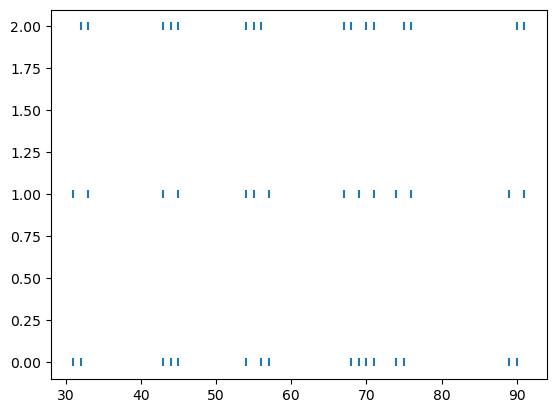

In [16]:
plt.figure()
plt.scatter(np.where(matrix)[1], np.where(matrix)[0], marker='|')
plt.show()

In [17]:
np.sum(matrix)

46

In [18]:
len(windows)

98